### Project Summary: Heart Disease Prediction
### Objective: The goal of this project was to predict the likelihood of heart disease or heart attacks based on various health, lifestyle, and demographic factors. The project aimed to develop machine learning models that can accurately classify individuals as at-risk for heart disease using available features, while addressing the challenges of class imbalance in the dataset.

### Dataset: The dataset consisted of health-related variables such as blood pressure, cholesterol levels, BMI, smoking status, diabetes, physical activity, and mental and physical health scores, as well as demographic features like age, sex, education, and income. The target variable was whether an individual had experienced heart disease or a heart attack.

### The dataset contains the following columns related to heart disease risk factors and demographic information: HeartDiseaseorAttack: Whether the person had heart disease or a heart attack (0 = No, 1 = Yes).
### HighBP: Indicates if the person has high blood pressure (1 = Yes, 0 = No).
### HighChol: Indicates if the person has high cholesterol (1 = Yes, 0 = No).
### BMI: Body Mass Index of the individual.
### Smoker: Indicates if the person smokes (1 = Yes, 0 = No).
### Diabetes: Indicates if the person has diabetes (1 = Yes, 0 = No).
### PhysActivity: Physical activity status (1 = Active, 0 = Inactive).
### Fruits: Indicates if the person consumes fruits regularly (1 = Yes, 0 = No).
### Veggies: Indicates if the person consumes vegetables regularly (1 = Yes, 0 = No).
### HvyAlcoholConsump: Heavy alcohol consumption (1 = Yes, 0 = No).
### MentHlth: Number of days of poor mental health in the past 30 days.
### PhysHlth: Number of days of poor physical health in the past 30 days.
### Sex: Gender (0 = Female, 1 = Male).
### Age: Age category (likely encoded numerically).
### Education: Education level (numerically encoded).
### Income: Income level (numerically encoded).

### Import necessary libraries 


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import confusion_matrix
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

### Load the dataset

In [3]:
data = pd.read_csv("HeartDisease.csv")
data

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

### null value checked

In [5]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
data.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
BMI                     84
Smoker                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
MentHlth                31
PhysHlth                31
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [7]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


###  Discriptive data analysis

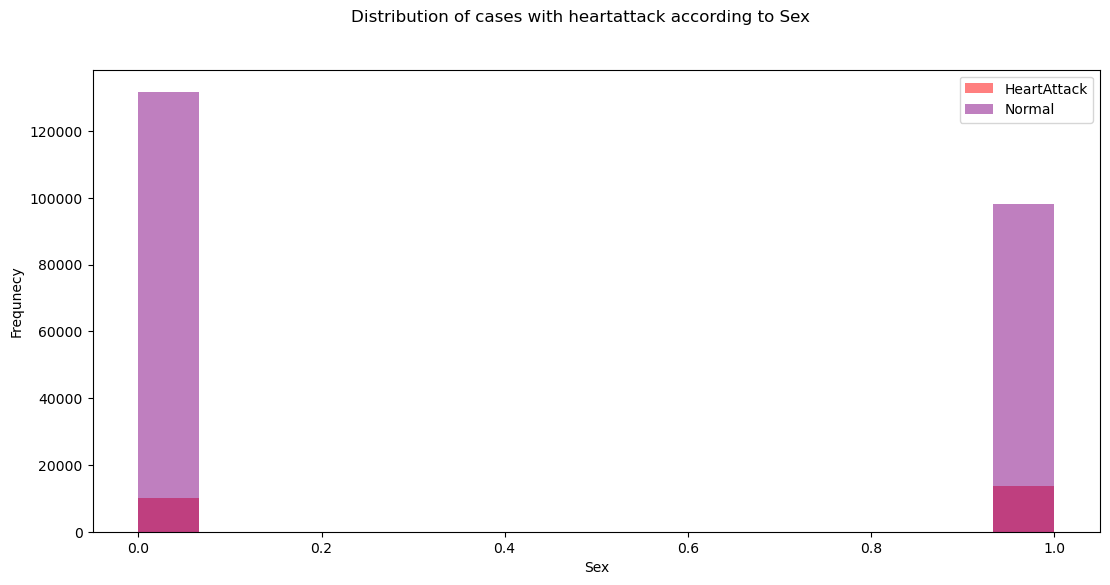

In [8]:
plt.figure(figsize = (13,6))

plt.hist(data[data["HeartDiseaseorAttack"]==1]["Sex"], bins =15, alpha =0.5, color="red", label="HeartAttack")
plt.hist(data[data["HeartDiseaseorAttack"]==0]["Sex"], bins =15, alpha =0.5, color="purple", label="Normal")

plt.xlabel("Sex")
plt.ylabel("Frequnecy")

plt.suptitle("Distribution of cases with heartattack according to Sex")
plt.legend()

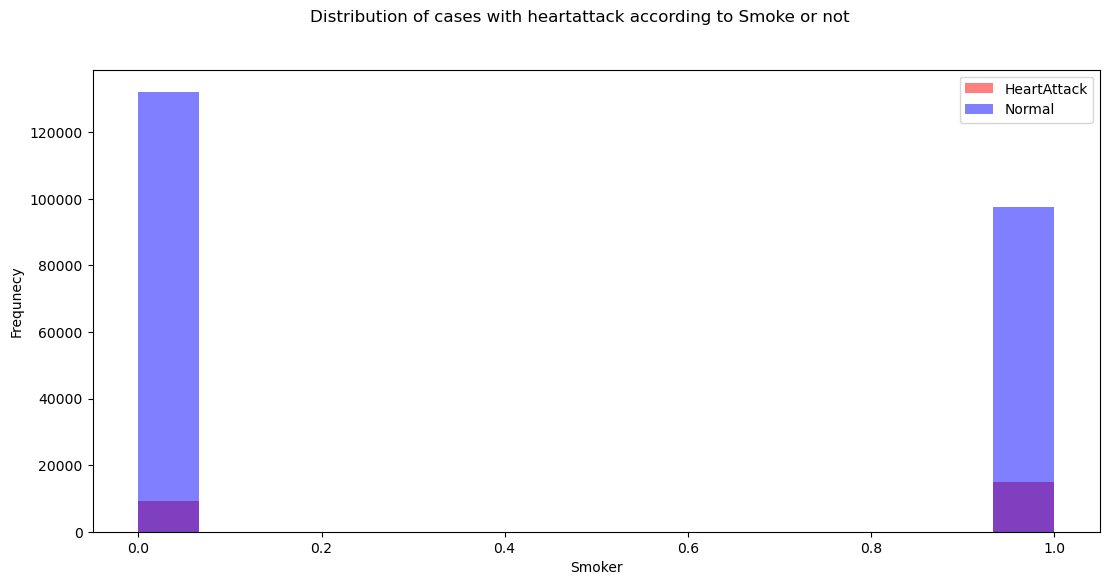

In [10]:
plt.figure(figsize = (13,6))

plt.hist(data[data["HeartDiseaseorAttack"]==1]["Smoker"], bins =15, alpha =0.5, color="red", label="HeartAttack")
plt.hist(data[data["HeartDiseaseorAttack"]==0]["Smoker"], bins =15, alpha =0.5, color="Blue", label="Normal")

plt.xlabel("Smoker")
plt.ylabel("Frequnecy")

plt.suptitle("Distribution of cases with heartattack according to Smoke or not")
plt.legend()

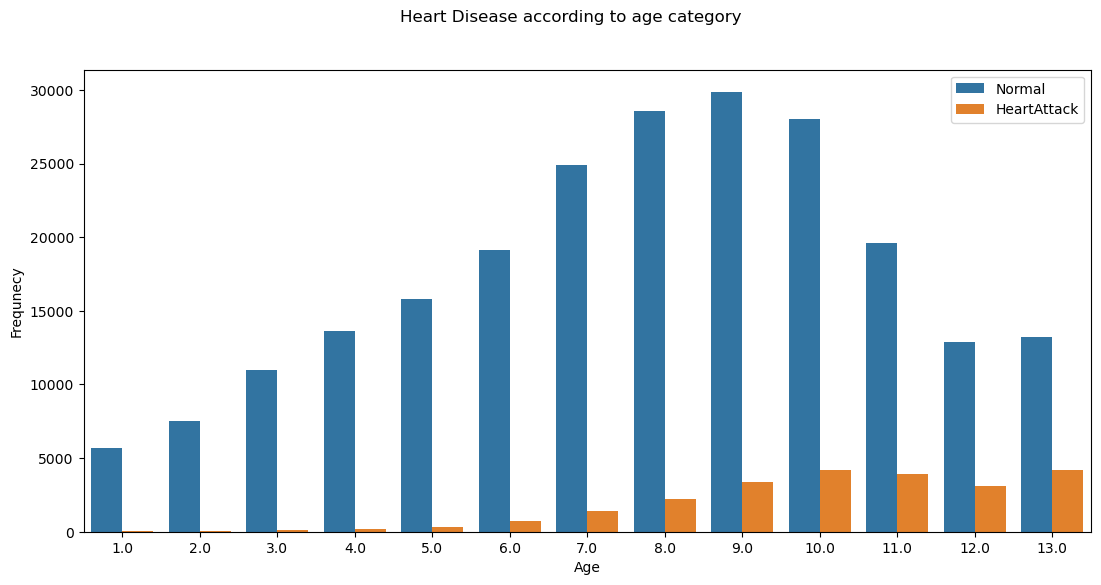

In [12]:
plt.figure(figsize = (13,6))

sns.countplot(x= data["Age"], hue = 'HeartDiseaseorAttack', data =data)
              
plt.xlabel("Age")
plt.ylabel("Frequnecy")
plt.legend(['Normal', 'HeartAttack'])
plt.suptitle("Heart Disease according to age category")
plt.show()

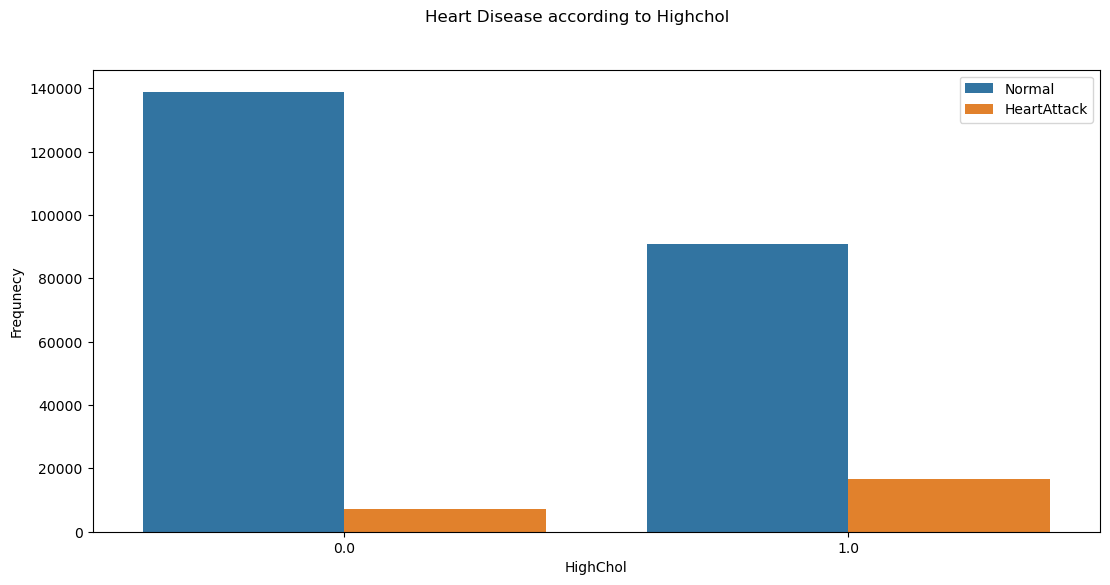

In [13]:
plt.figure(figsize = (13,6))

sns.countplot(x= data["HighChol"], hue = 'HeartDiseaseorAttack', data =data)
              
plt.xlabel("HighChol")
plt.ylabel("Frequnecy")
plt.legend(['Normal', 'HeartAttack'])
plt.suptitle("Heart Disease according to Highchol ")
plt.show()

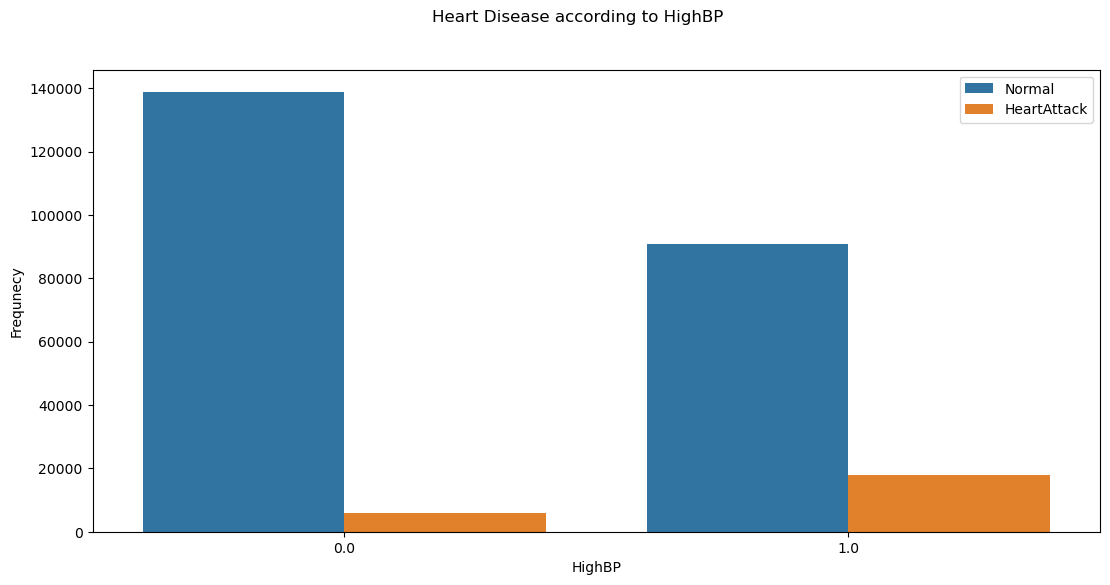

In [14]:
plt.figure(figsize = (13,6))

sns.countplot(x= data["HighBP"], hue = 'HeartDiseaseorAttack', data =data)
              
plt.xlabel("HighBP")
plt.ylabel("Frequnecy")
plt.legend(['Normal', 'HeartAttack'])
plt.suptitle("Heart Disease according to HighBP ")
plt.show()

### Correlation Matrix

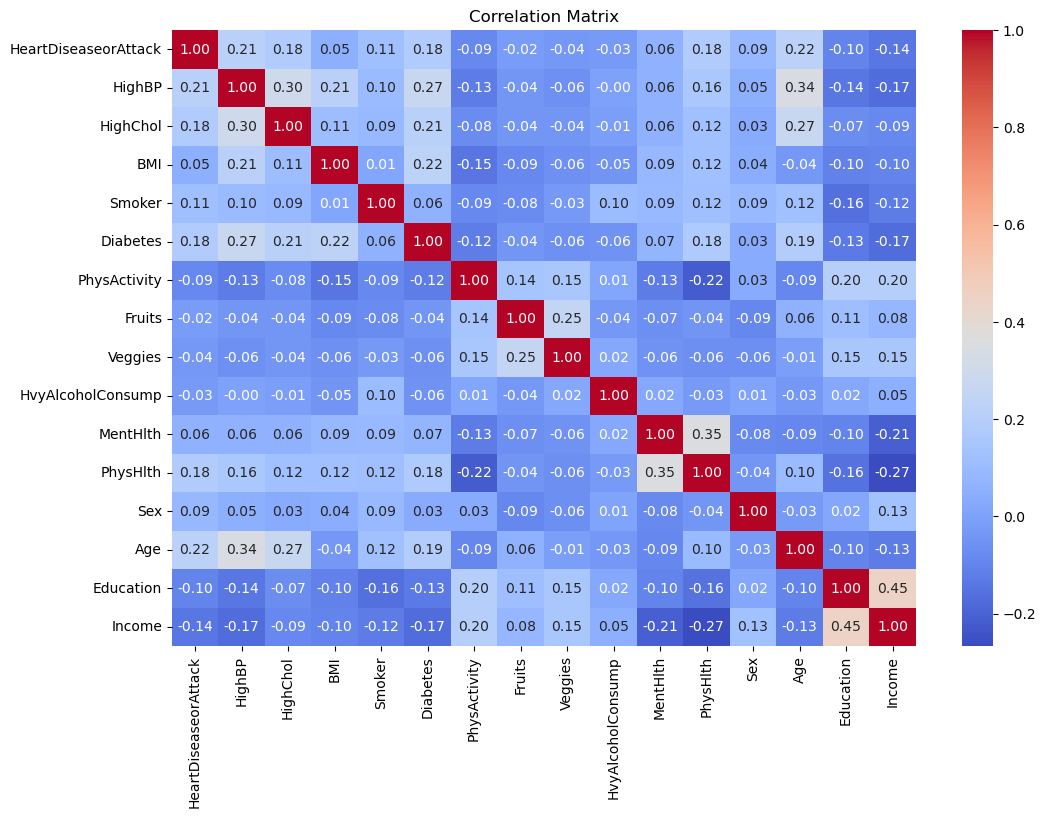

In [15]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Selection of feature and target variable

In [16]:
feature = data[['HighBP','HighChol','BMI','Smoker','Diabetes','PhysActivity','Fruits','Veggies',
                'HvyAlcoholConsump','MentHlth','PhysHlth','Sex','Age','Education','Income']]

#select target

target = data['HeartDiseaseorAttack']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(feature,target, shuffle= True, 
                                                 test_size=0.2, random_state=45)


In [18]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

tree = DecisionTreeClassifier()

tree.fit(x_train,y_train)

predicttion = tree.predict(x_test)

In [19]:
print(confusion_matrix(y_test,predicttion))
      
     

[[41792  4025]
 [ 3752  1167]]


In [20]:
print(classification_report(y_test, predicttion))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     45817
         1.0       0.22      0.24      0.23      4919

    accuracy                           0.85     50736
   macro avg       0.57      0.57      0.57     50736
weighted avg       0.85      0.85      0.85     50736



In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)

rfc.fit(x_train,y_train)

pred = rfc.predict(x_test)


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     45817
         1.0       0.33      0.08      0.13      4919

    accuracy                           0.89     50736
   macro avg       0.62      0.53      0.54     50736
weighted avg       0.85      0.89      0.87     50736



### Final Evaluation on the test set

In [23]:
final_model = LogisticRegression()  
final_model.fit(x_train, y_train)

y_test_pred = final_model.predict(x_test)


print("Final Model Performance on Test Set")

print(classification_report(y_test, y_test_pred))


Final Model Performance on Test Set
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45817
         1.0       0.47      0.06      0.11      4919

    accuracy                           0.90     50736
   macro avg       0.69      0.53      0.53     50736
weighted avg       0.87      0.90      0.87     50736



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Conclusion - 
### The models successfully predicted heart disease with a balanced trade-off between precision and recall.
### High Blood Pressure (HighBP) and High Cholesterol (HighChol) were the most significant contributors.
### BMI was another key driver, with higher BMI associated with higher risk.
### Physical Activity and a healthy diet (fruits and vegetables consumption) were negatively correlated with heart disease, suggesting a protective effect.

### This project demonstrated the potential of machine learning in predicting heart disease risk based on health and lifestyle factors. By addressing class imbalance and optimizing classification thresholds, the models were able to provide accurate predictions. Feature importance analysis provided insights into the key drivers of heart disease, which align with medical knowledge.